In [15]:
import random

import cv2
from matplotlib import pyplot as plt

from PIL import Image
import albumentations as A
import numpy as np

In [ ]:
# transform = A.Compose([
#     A.RandomCrop(480, 480),
#     A.RandomBrightnessContrast(p=0.3),
#     A.ColorJitter])


In [2]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

(333, 500, 3)


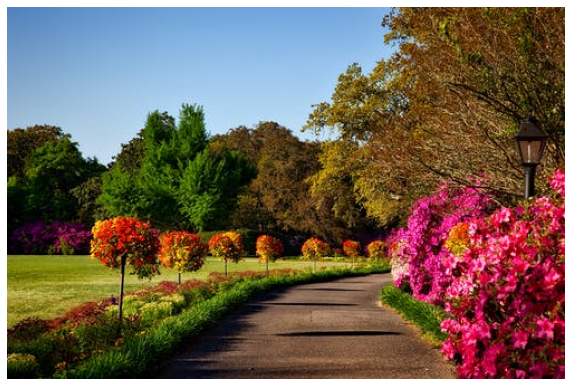

In [28]:
# image = cv2.imread('paper_texture.jpg')
image = cv2.imread('park.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
visualize(image)

In [16]:
# res = cv2.resize(image,None,fx=1.5, fy=1.5, interpolation = cv2.INTER_LINEAR)
# height, width = image.shape[:2]
# res = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)
# scaleX = 0.2
# scaleY = 0.2
# scaleDown = cv2.resize(image, None, fx= scaleX, fy= scaleY, interpolation= cv2.INTER_LINEAR)
# visualize(scaleDown)
# print(scaleDown.shape)

# def zoom_at(img, x, y, zoom):
#     w, h = img.size
#     zoom2 = zoom * 2
#     img = img.crop((x - w / zoom2, y - h / zoom2, 
#                     x + w / zoom2, y + h / zoom2))
#     return img.resize((w, h), Image.LANCZOS)

# img = Image.open("park.jpeg")

# img = zoom_at(img, 264.5, 275, 1.5)

# img = img.save('image_zoomed.png')


/tmp/ipykernel_32353/933694345.py:15: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return img.resize((w, h), Image.LANCZOS)


In [31]:
def zoom(img, zoom_factor=2):
    return cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor, interpolation = cv2.INTER_LINEAR)

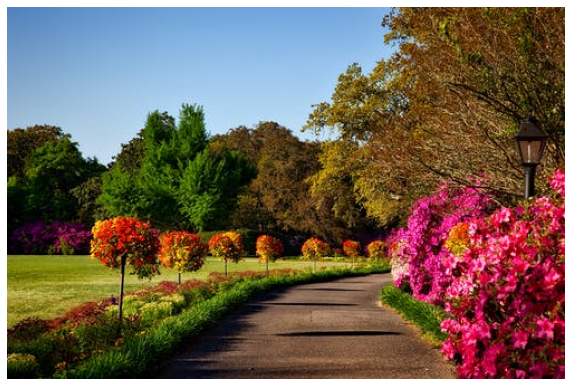

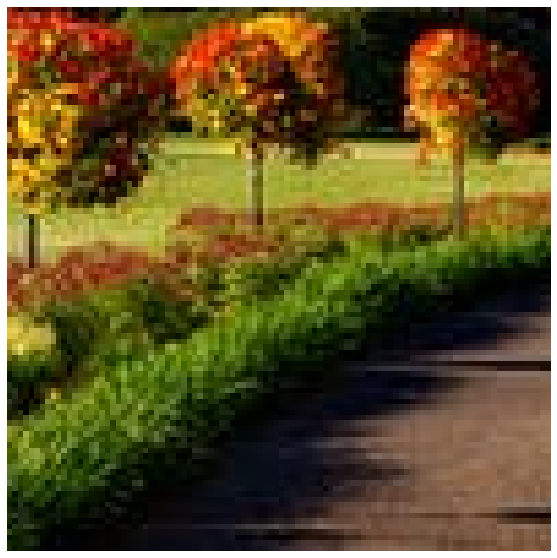

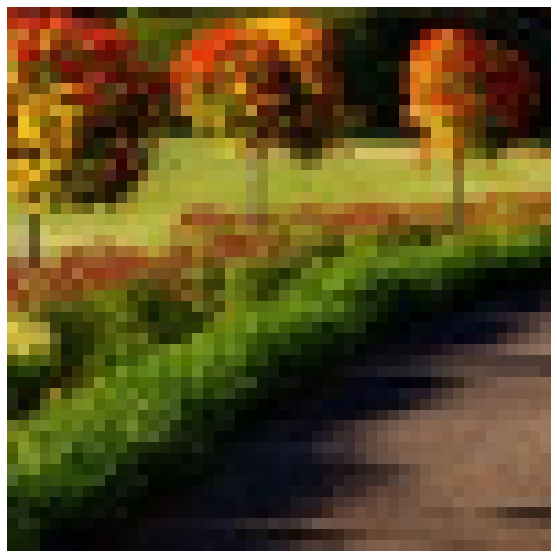

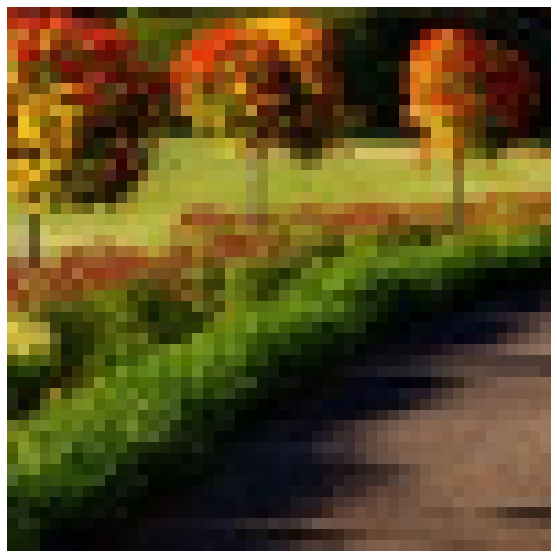

In [40]:
image = cv2.imread('rnd_images/park.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cropped = image[200:300, 150:250]
zoomed = zoom(cropped, 0.5)
zoomed_and_cropped = zoom(cropped, 0.5)
visualize(image)
visualize(cropped)
visualize(zoomed)
visualize(zoomed_and_cropped)

In [ ]:
transform = A.Affine(scale=1.5, p = 1)
augmented_image = transform(image=image)['image']
print(image.shape)
visualize(augmented_image)

In [ ]:
# # for char in [0, 1, 2, 3, 9]:
# image = cv2.putText(image, 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890', (15, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), 4, cv2.LINE_AA)
# image = cv2.putText(image, 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890', (15, 200), cv2.FONT_HERSHEY_DUPLEX,  3, (255,0,0), 4, cv2.LINE_AA)
# image = cv2.putText(image, 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890', (15, 300), cv2.FONT_HERSHEY_COMPLEX,  3, (255,0,0), 4, cv2.LINE_AA)
# image = cv2.putText(image, 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890', (15, 400), cv2.FONT_HERSHEY_TRIPLEX,  3, (255,0,0), 4, cv2.LINE_AA)
# image = cv2.putText(image, 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890', (15, 500), cv2.FONT_HERSHEY_COMPLEX_SMALL ,  3, (255,0,0), 4, cv2.LINE_AA)
# image = cv2.putText(image, 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890', (15, 600), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX ,  3, (255,0,0), 4, cv2.LINE_AA)
# image = cv2.putText(image, 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890', (15, 700), cv2.FONT_HERSHEY_SCRIPT_COMPLEX ,  3, (255,0,0), 4, cv2.LINE_AA)
# image = cv2.putText(image, 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890', (15, 800), cv2.FONT_ITALIC, 3, (255,0,0), 4, cv2.LINE_AA)
# visualize(image)

In [ ]:
transform = A.ColorJitter(brightness=0.2, contrast=0.5, saturation=0.8, hue=0.9, always_apply=False, p = 0.5)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

In [ ]:
visualize(augmented_image)

In [ ]:
def emboss_image(image):
    kernel_emboss_1=np.array([[0,-1,-1],[1,0,-1],[1,1,0]])
    image = cv2.filter2D(image, -1, kernel_emboss_1)+128
#     cv2.imwrite(Folder_name + "/Emboss-" + Extension, image)
    return image

In [ ]:
image = emboss_image(image)
visualize(image)

In [ ]:
# transform = A.AdvancedBlur(blur_limit=(3, 7), sigmaX_limit=(0.2, 1.0), sigmaY_limit=(0.2, 1.0), rotate_limit=90, beta_limit=(0.5, 8.0), noise_limit=(0.9, 1.1), always_apply=False, p=1) 
# augmented_image = transform(image=image)['image']
# visualize(augmented_image)

In [ ]:
transform = A.GaussNoise()
augmented_image = transform(image=image)['image']
visualize(augmented_image)

In [ ]:
transform = A.HueSaturationValue()
augmented_image = transform(image=image)['image']
visualize(augmented_image)